In [1]:
%load_ext autoreload
%autoreload 2

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings
import pyEPR as epr

In [2]:
design = designs.DesignPlanar({}, True)
design.chips.main.size['size_x'] = '2mm'
design.chips.main.size['size_y'] = '2mm'

gui = MetalGUI(design)

In [3]:
from qiskit_metal.qlibrary.qubits.transmon_cross_fl import TransmonCrossFL
from qiskit_metal.qlibrary.couplers.tunable_coupler_01 import TunableCoupler01

In [4]:
TransmonCrossFL.get_template_options(design)

{'pos_x': '0.0um',
 'pos_y': '0.0um',
 'orientation': '0.0',
 'chip': 'main',
 'layer': '1',
 'connection_pads': {},
 '_default_connection_pads': {'connector_type': '0',
  'claw_length': '30um',
  'ground_spacing': '5um',
  'claw_width': '10um',
  'claw_gap': '6um',
  'connector_location': '0'},
 'cross_width': '20um',
 'cross_length': '200um',
 'cross_gap': '20um',
 'make_fl': True,
 'fl_options': {'t_top': '15um',
  't_offset': '0um',
  't_inductive_gap': '3um',
  't_width': '5um',
  't_gap': '3um'},
 'hfss_wire_bonds': False,
 'q3d_wire_bonds': False,
 'hfss_inductance': '10nH',
 'hfss_capacitance': 0,
 'hfss_resistance': 0,
 'hfss_mesh_kw_jj': 7e-06,
 'q3d_inductance': '10nH',
 'q3d_capacitance': 0,
 'q3d_resistance': 0,
 'q3d_mesh_kw_jj': 7e-06,
 'gds_cell_name': 'my_other_junction'}

In [5]:
TunableCoupler01.get_template_options(design)

{'pos_x': '0.0um',
 'pos_y': '0.0um',
 'orientation': '0.0',
 'chip': 'main',
 'layer': '1',
 'connection_pads': {},
 '_default_connection_pads': {},
 'c_width': '400um',
 'l_width': '20um',
 'l_gap': '10um',
 'a_height': '60um',
 'cp_height': '15um',
 'cp_arm_length': '30um',
 'cp_arm_width': '6um',
 'cp_gap': '6um',
 'cp_gspace': '3um',
 'fl_width': '5um',
 'fl_gap': '3um',
 'fl_length': '10um',
 'fl_ground': '2um',
 'hfss_wire_bonds': False,
 'q3d_wire_bonds': False,
 'hfss_inductance': '10nH',
 'hfss_capacitance': 0,
 'hfss_resistance': 0,
 'hfss_mesh_kw_jj': 7e-06,
 'q3d_inductance': '10nH',
 'q3d_capacitance': 0,
 'q3d_resistance': 0,
 'q3d_mesh_kw_jj': 7e-06,
 'gds_cell_name': 'my_other_junction'}

In [6]:
Q1 = TransmonCrossFL(design, 'Q1', options = dict(pos_x = '0', pos_y='-0.3mm',
                                                 connection_pads = dict(
                                                     bus_01 = dict(connector_location = '180',claw_length ='95um'),
                                                     readout = dict(connector_location = '0')),
                                                 fl_options = dict()))

Q2 = TransmonCrossFL(design, 'Q2', options = dict(pos_x = '0', pos_y='0.3mm', orientation = '180',
                                                 connection_pads = dict(
                                                     bus_02 = dict(connector_location = '0',claw_length ='95um'),
                                                     readout = dict(connector_location = '180')),
                                                 fl_options = dict()))


tune_c_Q12 = TunableCoupler01(design,'Tune_C_Q12', options = dict(pos_x = '-0.06mm', pos_y = '0',
                                                                  orientation=90, c_width='500um'))

gui.rebuild()
gui.autoscale()

In [7]:
# Get a list of all the qcomponents in QDesign and then zoom on them.
all_component_names = design.components.keys()

gui.zoom_on_components(all_component_names)

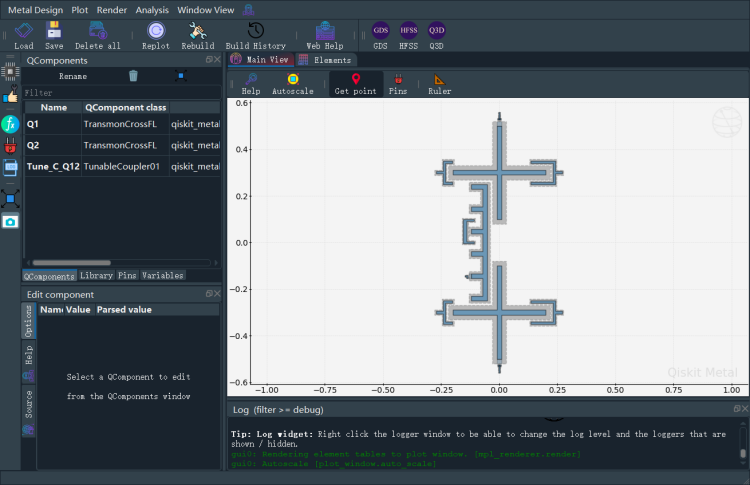

In [8]:
#Save screenshot as a .png formatted file.
gui.screenshot()

# 仿真分析

In [9]:
from qiskit_metal.analyses.quantization import EPRanalysis
eig_qres = EPRanalysis(design, "hfss")

In [10]:
hfss = eig_qres.sim.renderer

In [11]:
hfss.open_ansys(path='C:\Program Files\AnsysEM\AnsysEM21.2\Win64')

In [12]:
# hfss.start()

In [12]:
hfss.connect_ansys('C:\\Users\\admin\\Documents\\Ansoft', 'Project1')

INFO 08:44PM [connect_project]: Connecting to Ansys Desktop API...
INFO 08:44PM [load_ansys_project]: 	File path to HFSS project found.
INFO 08:44PM [load_ansys_project]: 	Opened Ansys App
INFO 08:44PM [load_ansys_project]: 	Opened Ansys Desktop v2021.2.0
INFO 08:45PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/admin/Documents/Ansoft/
	Project:   Project1
INFO 08:45PM [connect_design]: 	Opened active design
	Design:    MIT_QCQ [Solution type: Eigenmode]
INFO 08:45PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 08:45PM [connect]: 	Connected to project "Project1" and design "MIT_QCQ" 😀 



In [13]:
hfss.activate_ansys_design("MIT_QCQ", 'eigenmode')

INFO 08:45PM [connect_design]: 	Opened active design
	Design:    MIT_QCQ [Solution type: Eigenmode]


In [ ]:
# hfss.render_design(['Q1', 'Q2', 'Tune_C_Q12'], [])
# hfss.save_screenshot()

## 仿真

In [15]:
setup = hfss.pinfo.setup
setup.n_modes = 3
setup.passes = 20
setup.delta_f = 1
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
pinfo.design.set_variable('Lj', '10 nH')
pinfo.design.set_variable('Cj', '0 fF')

setup.analyze()

INFO 09:24PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 3
Number of simulation passes              = 20
Convergence freq max delta percent diff  = 1



In [16]:
# 设置hfss内的变量
pinfo.design.set_variable('Q1_Lj', '10 nH')
pinfo.design.set_variable('Q2_Lj', '10 nH')
pinfo.design.set_variable('Coup_Lj', '10nH')

'Coup_Lj'

In [17]:
pinfo.design.set_variable('Q1_Lj', '10 nH')

'Q1_Lj'

In [18]:
# 将变量赋值给Juntion的电感
pinfo.junctions['Q1'] = {
    'Lj_variable': 'Q1_Lj', 'rect': 'JJ_rect_Lj_Q1_rect_jj', 'line': 'JJ_Lj_Q1_rect_jj_', 'Cj_variable': 'Cj'
}
pinfo.junctions['Q2'] = {
    'Lj_variable': 'Q2_Lj', 'rect': 'JJ_rect_Lj_Q2_rect_jj', 'line': 'JJ_Lj_Q2_rect_jj_', 'Cj_variable': 'Cj'
}
pinfo.junctions['Coup'] = {
    'Lj_variable': 'Coup_Lj', 'rect': 'JJ_rect_Lj_Tune_C_Q12_rect_jj', 'line': 'JJ_Lj_Tune_C_Q12_rect_jj_', 'Cj_variable': 'Cj'
}
pinfo.validate_junction_info()

In [19]:
pinfo.dissipative['dielectrics_bulk'] = ['main']

## 计算EPR

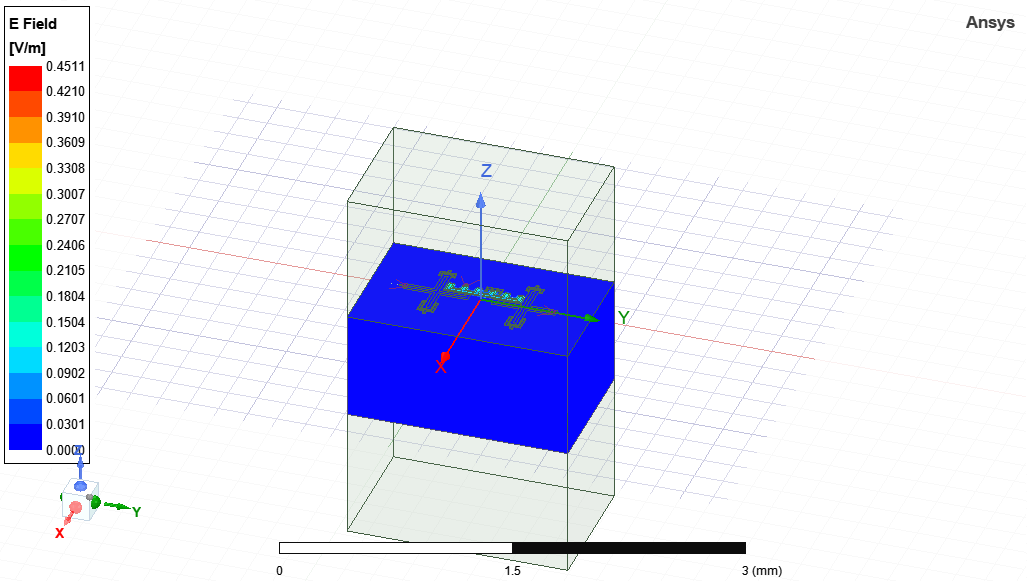

WindowsPath('D:/gitCode/StarrySky/Quantum Chip/QubitCouplerQubit_Coupling/MIT_QCQ_Metal/ansys.png')

In [20]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_fields('main')
hfss.save_screenshot()

In [21]:
hfss.clear_fields(['Mag_E1'])

In [22]:
hfss.set_mode(2, "Setup")

INFO 09:26PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


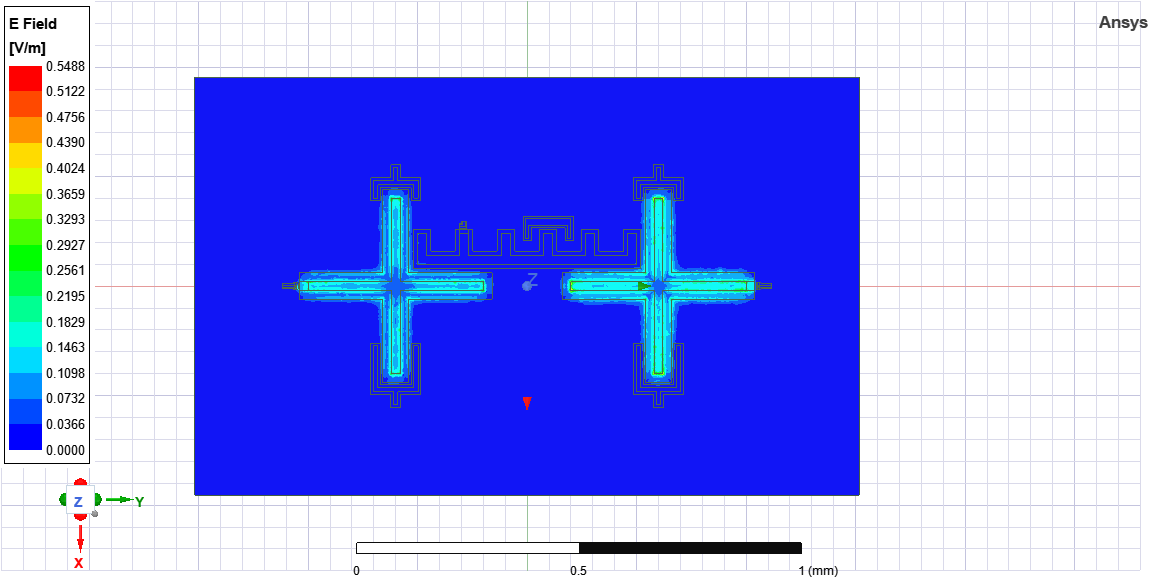

WindowsPath('D:/gitCode/StarrySky/Quantum Chip/QubitCouplerQubit_Coupling/MIT_QCQ_Metal/ansys.png')

In [23]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_fields('main')
hfss.save_screenshot()

In [24]:
hfss.clear_fields(['Mag_E1'])

In [25]:
hfss.set_mode(3, "Setup")

INFO 09:26PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


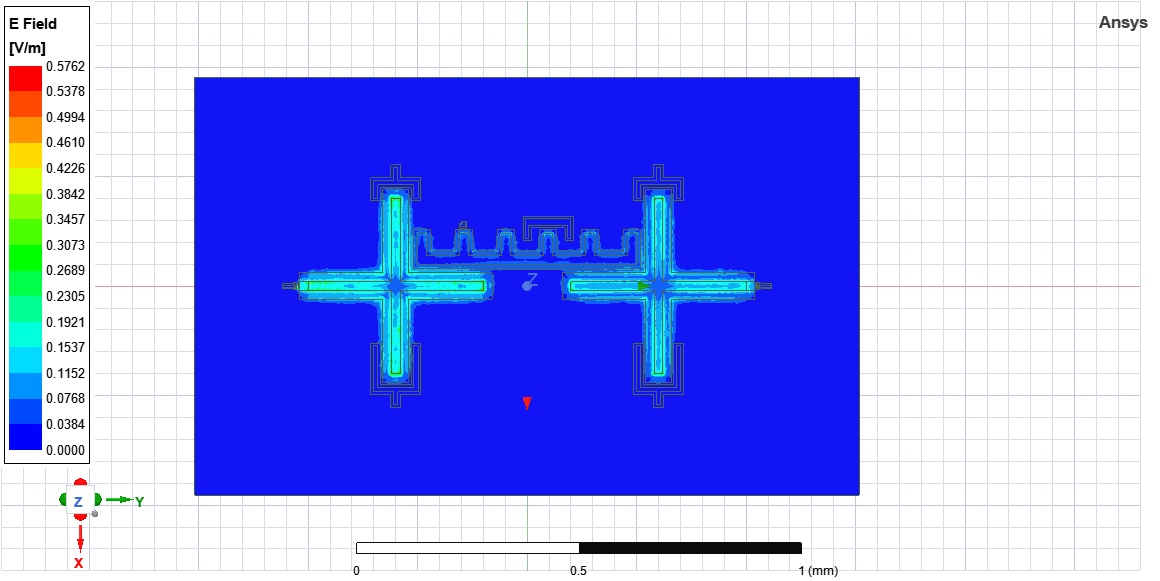

WindowsPath('D:/gitCode/StarrySky/Quantum Chip/QubitCouplerQubit_Coupling/MIT_QCQ_Metal/ansys.png')

In [26]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_fields('main')
hfss.save_screenshot()

In [28]:
eprd = epr.DistributedAnalysis(pinfo)

Design "MIT_QCQ" info:
	# eigenmodes    3
	# variations    1


In [29]:
eprd.do_EPR_analysis()
epra = epr.QuantumAnalysis(eprd.data_filename)

  options=pd.Series(get_instance_vars(self.options)),




Variation 0  [1/1]


  Ljs = pd.Series({})

  Cjs = pd.Series({})

  _Om = pd.Series({})




  Mode 0 at 4.13 GHz   [1/3]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.3%  2.102e-25 1.572e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 98.67%
	Q1              0.0191851  (+)        0.000258554
		Energy fraction (Lj over Lj&Cj)= 98.67%
	Q2              0.0202371  (+)        0.000272731
		Energy fraction (Lj over Lj&Cj)= 98.67%
	Coup            0.951971  (+)        0.0128295
		(U_tot_cap-U_tot_ind)/mean=0.72%


  Qp = pd.Series({})



Calculating Qdielectric_main for mode 0 (0/2)
p_dielectric_main_0 = 0.9176351194018062


  sol = sol.append(self.get_Qdielectric(

  _Om = pd.Series({})




  Mode 1 at 4.61 GHz   [2/3]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.0%  6.104e-25 6.139e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_1j   sign s_1j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 98.35%
	Q1              0.372039  (+)        0.00624548
		Energy fraction (Lj over Lj&Cj)= 98.35%
	Q2              0.616592  (+)        0.0103508
		Energy fraction (Lj over Lj&Cj)= 98.35%
	Coup            0.000799193  (+)        1.34162e-05
		(U_tot_cap-U_tot_ind)/mean=0.85%


  Qp = pd.Series({})



Calculating Qdielectric_main for mode 1 (1/2)
p_dielectric_main_1 = 0.9185658425902313


  sol = sol.append(self.get_Qdielectric(

  _Om = pd.Series({})




  Mode 2 at 4.64 GHz   [3/3]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.0%  6.522e-25 6.324e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_2j   sign s_2j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 98.33%
	Q1              0.598653  (+)        0.0101729
		Energy fraction (Lj over Lj&Cj)= 98.33%
	Q2              0.352324  (+)        0.00598704
		Energy fraction (Lj over Lj&Cj)= 98.33%
	Coup            0.0387072  (+)        0.000657751

  Qp = pd.Series({})




		(U_tot_cap-U_tot_ind)/mean=0.86%
Calculating Qdielectric_main for mode 2 (2/2)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_2 = 0.9187181750329265


  options=pd.Series(get_instance_vars(self.options)),

WARNING 09:27PM [__init__]: <p>Error: <class 'IndexError'></p>



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project1\MIT_QCQ\2022-03-07 21-27-46.npz


	 Differences in variations:




In [31]:
epra.analyze_all_variations(cos_trunc = 8, fock_trunc = 7)


 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization


  result['Q_coupling'] = self.Qm_coupling[variation][self.Qm_coupling[variation].columns[junctions]][modes]#TODO change the columns to junctions



Pm_norm=
modes
0    1.014558
1    1.017220
2    1.017534
dtype: float64

Pm_norm idx =
      Q1     Q2   Coup
0  False  False   True
1   True   True  False
2   True   True  False


  result['Qs'] = self.Qs[variation][self.PM[variation].columns[junctions]][modes] #TODO change the columns to junctions



*** P (participation matrix, not normlz.)
         Q1        Q2      Coup
0  0.018932  0.019970  0.939420
1  0.365960  0.606518  0.000786
2  0.588752  0.346497  0.038067

*** S (sign-bit matrix)
   s_Q1  s_Q2  s_Coup
0     1     1       1
1     1     1       1
2     1     1       1
*** P (participation matrix, normalized.)
     0.019     0.02     0.95
      0.37     0.62  0.00079
       0.6     0.35    0.038

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       119     5.86       16
      5.86     84.4      144
        16      144     79.8

*** Chi matrix ND (MHz) 
       159     -329     3.88
      -329     -325     -333
      3.88     -333      342

*** Frequencies O1 PT (MHz)
0    4001.803252
1    4451.573701
2    4479.323425
dtype: float64

*** Frequencies ND (MHz)
0    3977.371933
1    4285.622194
2    4618.756635
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1, 2]


OrderedDict([('0',
              OrderedDict([('f_0', 0    4131.411932
                            1    4610.989998
                            2    4639.165605
                            Name: 0, dtype: float64),
                           ('f_1',
                            0    4001.803252
                            1    4451.573701
                            2    4479.323425
                            dtype: float64),
                           ('f_ND',
                            0    3977.371933
                            1    4285.622194
                            2    4618.756635
                            dtype: float64),
                           ('chi_O1',
                                        0           1           2
                            0  118.666081    5.861365   16.023834
                            1    5.861365   84.418055  144.135119
                            2   16.023834  144.135119   79.762704),
                           ('chi_ND',
            

In [33]:
# 4b. Report solved results
swp_variable = 'Q1_Lj' # suppose we swept an optimetric analysis vs. inductance Lj_alice
epra.plot_hamiltonian_results(swp_variable=swp_variable)
epra.report_results(swp_variable=swp_variable, numeric=True)

#### Mode frequencies (MHz)

###### Numerical diagonalization

Q1_Lj,10
0,3977.37
1,4285.62
2,4618.76


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

0       1       2
Q1_Lj                          
10    0  159.21 -329.26    3.88
      1 -329.26 -324.58 -333.16
      2    3.88 -333.16  341.69

## 调谐Coupler

### Coup = 20nH

In [44]:
setup = hfss.pinfo.setup
setup.n_modes = 3
setup.passes = 20
setup.delta_f = 1
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
pinfo.design.set_variable('Coup_Lj', '20 nH')

setup.analyze()

INFO 09:46PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 3
Number of simulation passes              = 20
Convergence freq max delta percent diff  = 1



In [45]:
# set junctions' info
pinfo.junctions['Q1'] = {
    'Lj_variable': 'Q1_Lj', 'rect': 'JJ_rect_Lj_Q1_rect_jj', 'line': 'JJ_Lj_Q1_rect_jj_', 'Cj_variable': 'Cj'
}
pinfo.junctions['Q2'] = {
    'Lj_variable': 'Q2_Lj', 'rect': 'JJ_rect_Lj_Q2_rect_jj', 'line': 'JJ_Lj_Q2_rect_jj_', 'Cj_variable': 'Cj'
}
pinfo.junctions['Coup'] = {
    'Lj_variable': 'Coup_Lj', 'rect': 'JJ_rect_Lj_Tune_C_Q12_rect_jj', 'line': 'JJ_Lj_Tune_C_Q12_rect_jj_', 'Cj_variable': 'Cj'
}
pinfo.validate_junction_info()

INFO 09:49PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


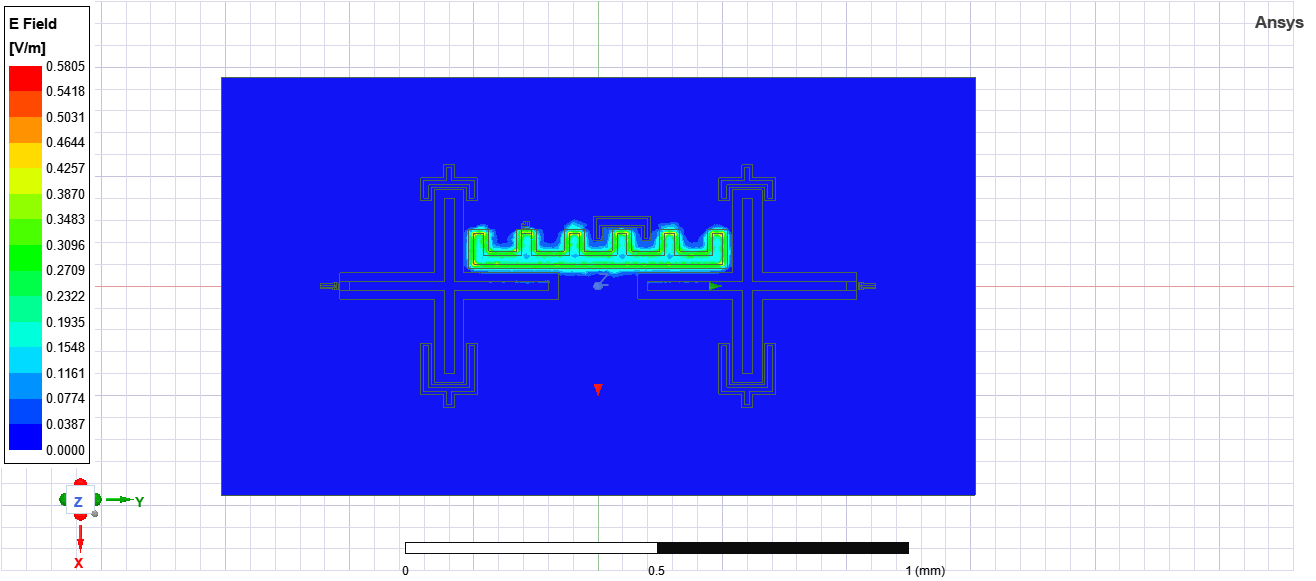

WindowsPath('D:/gitCode/StarrySky/Quantum Chip/QubitCouplerQubit_Coupling/MIT_QCQ_Metal/ansys.png')

In [46]:
hfss.set_mode(1, "Setup")
hfss.clear_fields(['Mag_E1'])
hfss.modeler._modeler.ShowWindow()
hfss.plot_fields('main')
hfss.save_screenshot()

INFO 09:49PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


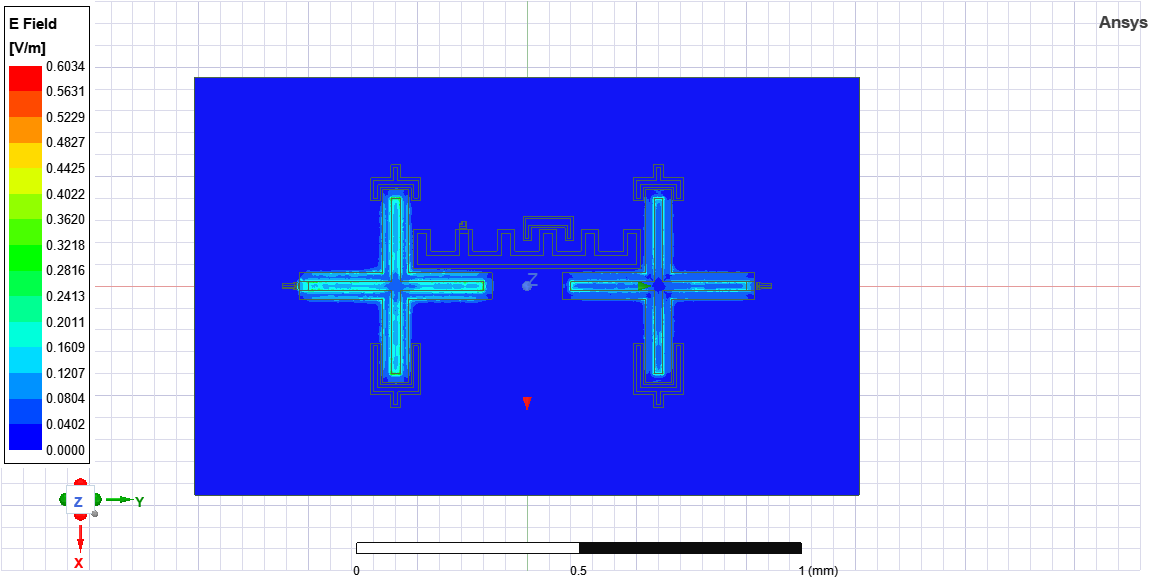

WindowsPath('D:/gitCode/StarrySky/Quantum Chip/QubitCouplerQubit_Coupling/MIT_QCQ_Metal/ansys.png')

In [47]:
hfss.set_mode(2, "Setup")
hfss.clear_fields(['Mag_E1'])
hfss.modeler._modeler.ShowWindow()
hfss.plot_fields('main')
hfss.save_screenshot()

INFO 09:49PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


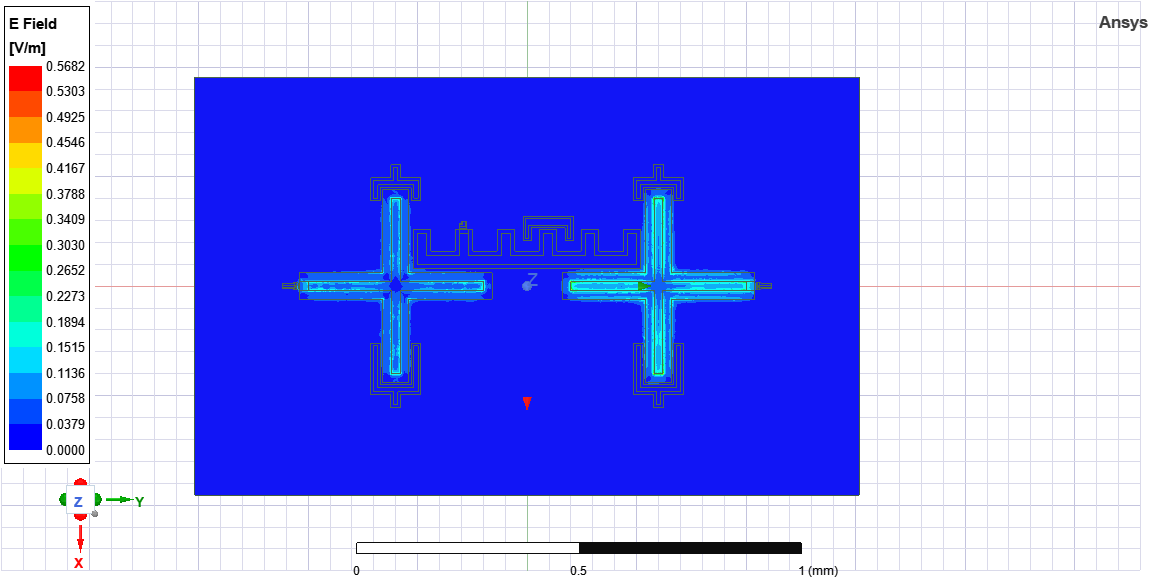

WindowsPath('D:/gitCode/StarrySky/Quantum Chip/QubitCouplerQubit_Coupling/MIT_QCQ_Metal/ansys.png')

In [48]:
hfss.set_mode(3, "Setup")
hfss.clear_fields(['Mag_E1'])
hfss.modeler._modeler.ShowWindow()
hfss.plot_fields('main')
hfss.save_screenshot()

In [49]:
eprd = epr.DistributedAnalysis(pinfo)
eprd.do_EPR_analysis()
epra = epr.QuantumAnalysis(eprd.data_filename)

  options=pd.Series(get_instance_vars(self.options)),



Design "MIT_QCQ" info:
	# eigenmodes    3
	# variations    1

Variation 0  [1/1]


  Ljs = pd.Series({})

  Cjs = pd.Series({})

  _Om = pd.Series({})




  Mode 0 at 2.91 GHz   [1/3]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.6%  6.534e-25 2.332e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 99.34%
	Q1              0.0010559  (+)        7.0558e-06
		Energy fraction (Lj over Lj&Cj)= 99.34%
	Q2              0.00105908  (+)        7.077e-06


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 98.68%
	Coup            0.994233  (+)        0.0132874
		(U_tot_cap-U_tot_ind)/mean=0.66%
Calculating Qdielectric_main for mode 0 (0/2)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_0 = 0.9134013945938855


  _Om = pd.Series({})




  Mode 1 at 4.65 GHz   [2/3]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.0%  4.094e-25 4.114e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_1j   sign s_1j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 98.32%
	Q1              0.690179  (+)        0.0117766
		Energy fraction (Lj over Lj&Cj)= 98.32%
	Q2              0.298743  (+)        0.00509747
		Energy fraction (Lj over Lj&Cj)= 96.70%
	Coup            8.38658e-05  (+)        2.86201e-06
		(U_tot_cap-U_tot_ind)/mean=0.88%


  Qp = pd.Series({})



Calculating Qdielectric_main for mode 1 (1/2)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_1 = 0.9197991717889848


  _Om = pd.Series({})




  Mode 2 at 4.66 GHz   [3/3]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.0%  3.428e-25 3.436e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_2j   sign s_2j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 98.31%
	Q1              0.297588  (+)        0.00510409
		Energy fraction (Lj over Lj&Cj)= 98.31%
	Q2              0.689801  (+)        0.0118311


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 96.68%
	Coup            0.00204752  (+)        7.02363e-05
		(U_tot_cap-U_tot_ind)/mean=0.87%
Calculating Qdielectric_main for mode 2 (2/2)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_2 = 0.9197526401866034


  options=pd.Series(get_instance_vars(self.options)),

WARNING 09:49PM [__init__]: <p>Error: <class 'IndexError'></p>



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project1\MIT_QCQ\2022-03-07 21-49-35.npz


	 Differences in variations:




In [50]:
epra.analyze_all_variations(cos_trunc = 8, fock_trunc = 7)


 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization


  result['Q_coupling'] = self.Qm_coupling[variation][self.Qm_coupling[variation].columns[junctions]][modes]#TODO change the columns to junctions

  result['Qs'] = self.Qs[variation][self.PM[variation].columns[junctions]][modes] #TODO change the columns to junctions



Pm_norm=
modes
0    1.013411
1    1.017932
2    1.017646
dtype: float64

Pm_norm idx =
      Q1     Q2   Coup
0  False  False   True
1   True   True  False
2   True   True  False
*** P (participation matrix, not normlz.)
         Q1        Q2      Coup
0  0.001042  0.001045  0.981182
1  0.678724  0.293785  0.000082
2  0.292612  0.678266  0.002013

*** S (sign-bit matrix)
   s_Q1  s_Q2  s_Coup
0     1     1       1
1     1     1       1
2     1     1       1
*** P (participation matrix, normalized.)
     0.001    0.001     0.99
      0.69      0.3  8.2e-05
       0.3     0.69    0.002

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       128    0.247     1.04
     0.247     93.7      137
      1.04      137     93.9

*** Chi matrix ND (MHz) 
       142     2.32    0.299
      2.32     -310     -336
     0.299     -336      363

*** Frequencies O1 PT (MHz)
0    2780.530504
1    4486.648938
2    4498.079848
dtype: float64

*** Frequencies ND (MHz)
0   

OrderedDict([('0',
              OrderedDict([('f_0', 0    2909.152029
                            1    4648.722439
                            2    4660.760715
                            Name: 0, dtype: float64),
                           ('f_1',
                            0    2780.530504
                            1    4486.648938
                            2    4498.079848
                            dtype: float64),
                           ('f_ND',
                            0    2773.890470
                            1    4304.446125
                            2    4640.881525
                            dtype: float64),
                           ('chi_O1',
                                        0           1           2
                            0  127.975678    0.247482    1.044212
                            1    0.247482   93.662752  136.574017
                            2    1.044212  136.574017   93.871752),
                           ('chi_ND',
            

In [53]:
swp_variable = 'Coup_Lj' # suppose we swept an optimetric analysis vs. inductance Lj_alice
epra.plot_hamiltonian_results(swp_variable=swp_variable)
epra.report_results(swp_variable=swp_variable, numeric=True)

#### Mode frequencies (MHz)

###### Numerical diagonalization

Coup_Lj,20
0,2773.89
1,4304.45
2,4640.88


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

0       1       2
Coup_Lj                          
20      0  141.78    2.32    0.30
        1    2.32 -309.80 -336.12
        2    0.30 -336.12  363.07

### Coup=15nH

In [54]:
setup = hfss.pinfo.setup
setup.n_modes = 3
setup.passes = 20
setup.delta_f = 1
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
pinfo.design.set_variable('Coup_Lj', '15 nH')

setup.analyze()

INFO 09:52PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 3
Number of simulation passes              = 20
Convergence freq max delta percent diff  = 1



In [55]:
# set junctions' info
pinfo.junctions['Q1'] = {
    'Lj_variable': 'Q1_Lj', 'rect': 'JJ_rect_Lj_Q1_rect_jj', 'line': 'JJ_Lj_Q1_rect_jj_', 'Cj_variable': 'Cj'
}
pinfo.junctions['Q2'] = {
    'Lj_variable': 'Q2_Lj', 'rect': 'JJ_rect_Lj_Q2_rect_jj', 'line': 'JJ_Lj_Q2_rect_jj_', 'Cj_variable': 'Cj'
}
pinfo.junctions['Coup'] = {
    'Lj_variable': 'Coup_Lj', 'rect': 'JJ_rect_Lj_Tune_C_Q12_rect_jj', 'line': 'JJ_Lj_Tune_C_Q12_rect_jj_', 'Cj_variable': 'Cj'
}
pinfo.validate_junction_info()

INFO 09:54PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


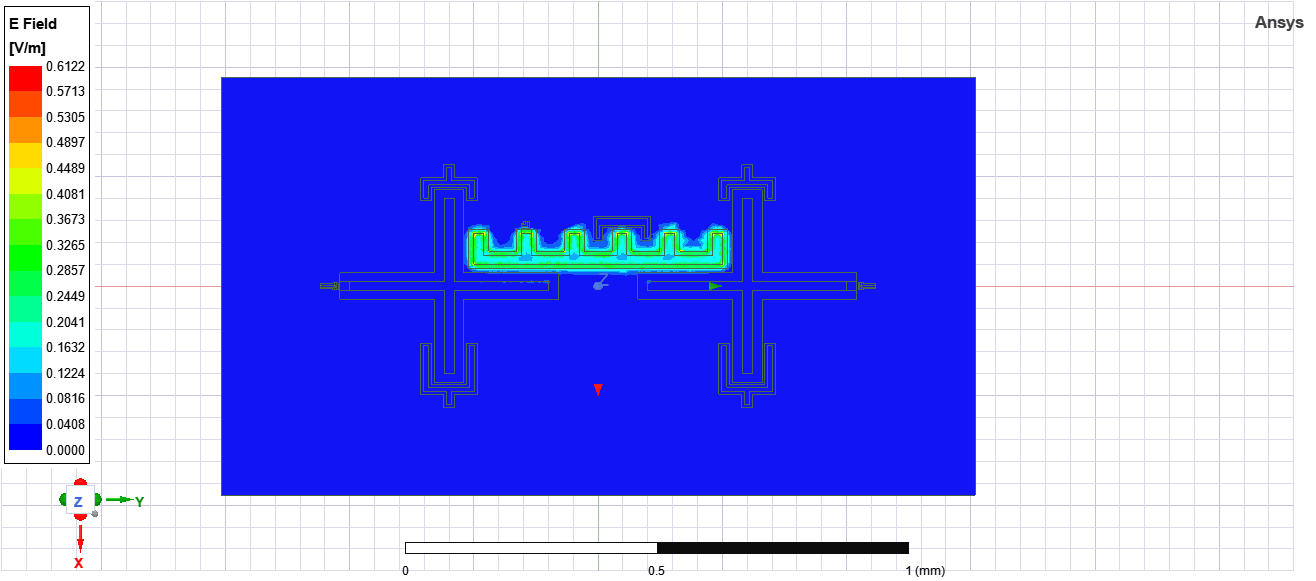

WindowsPath('D:/gitCode/StarrySky/Quantum Chip/QubitCouplerQubit_Coupling/MIT_QCQ_Metal/ansys.png')

In [56]:
hfss.set_mode(1, "Setup")
hfss.clear_fields(['Mag_E1'])
hfss.modeler._modeler.ShowWindow()
hfss.plot_fields('main')
hfss.save_screenshot()

INFO 09:54PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


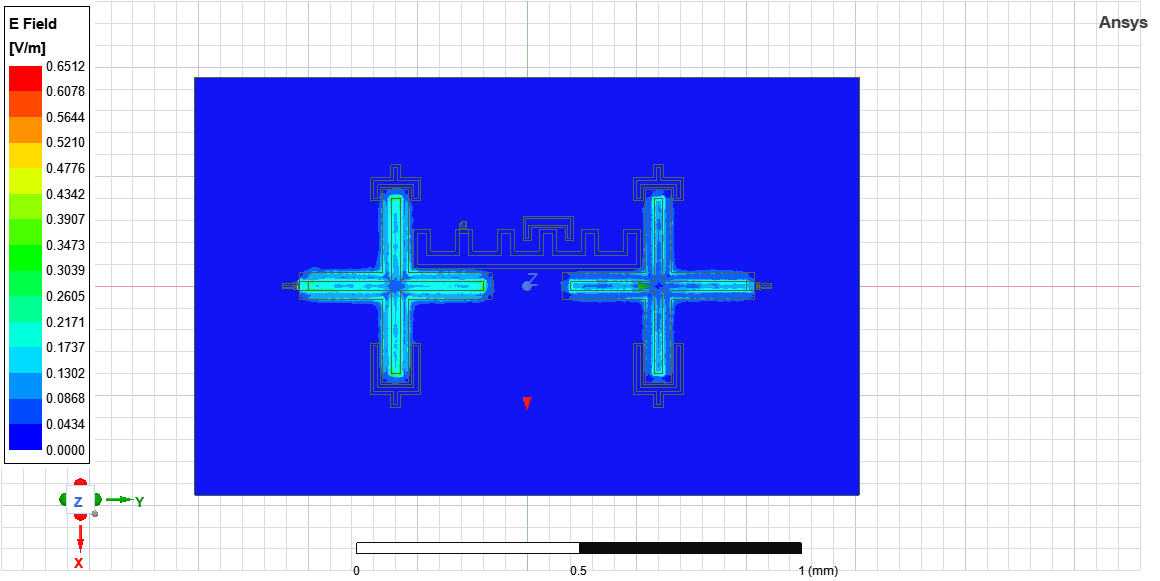

WindowsPath('D:/gitCode/StarrySky/Quantum Chip/QubitCouplerQubit_Coupling/MIT_QCQ_Metal/ansys.png')

In [57]:
hfss.set_mode(2, "Setup")
hfss.clear_fields(['Mag_E1'])
hfss.modeler._modeler.ShowWindow()
hfss.plot_fields('main')
hfss.save_screenshot()

INFO 09:54PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


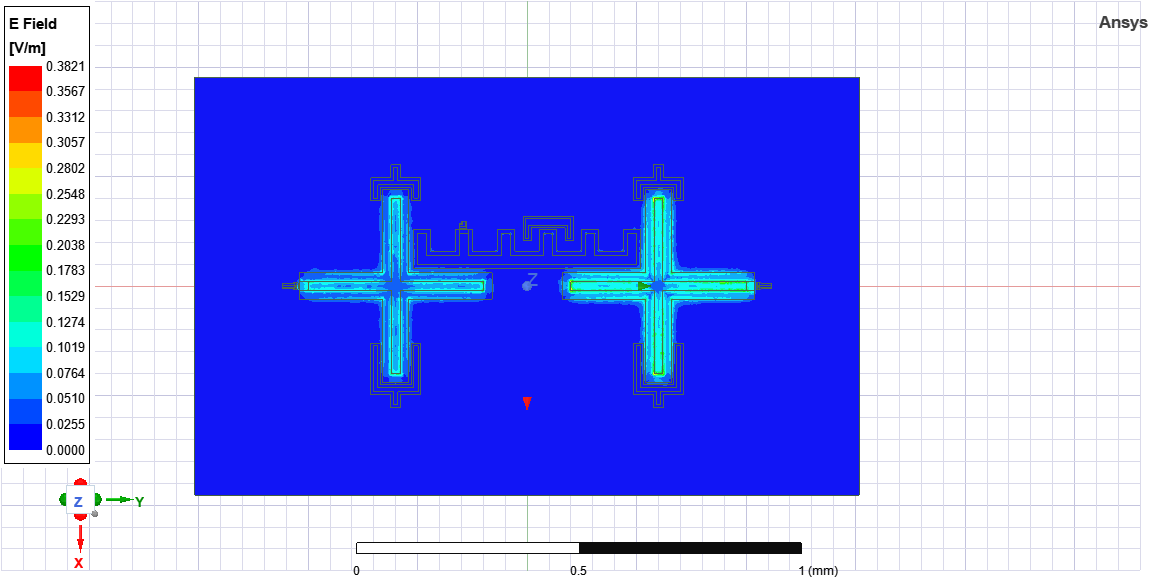

WindowsPath('D:/gitCode/StarrySky/Quantum Chip/QubitCouplerQubit_Coupling/MIT_QCQ_Metal/ansys.png')

In [58]:
hfss.set_mode(3, "Setup")
hfss.clear_fields(['Mag_E1'])
hfss.modeler._modeler.ShowWindow()
hfss.plot_fields('main')
hfss.save_screenshot()

In [59]:
eprd = epr.DistributedAnalysis(pinfo)
eprd.do_EPR_analysis()
epra = epr.QuantumAnalysis(eprd.data_filename)

  options=pd.Series(get_instance_vars(self.options)),



Design "MIT_QCQ" info:
	# eigenmodes    3
	# variations    1

Variation 0  [1/1]


  Ljs = pd.Series({})

  Cjs = pd.Series({})

  _Om = pd.Series({})




  Mode 0 at 3.37 GHz   [1/3]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.5%  6.167e-25 2.987e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 99.11%
	Q1              0.00239712  (+)        2.14447e-05
		Energy fraction (Lj over Lj&Cj)= 99.11%
	Q2              0.00241391  (+)        2.15949e-05


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 98.68%
	Coup            0.989251  (+)        0.0132748
		(U_tot_cap-U_tot_ind)/mean=0.72%
Calculating Qdielectric_main for mode 0 (0/2)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_0 = 0.9157694201808044


  _Om = pd.Series({})




  Mode 1 at 4.62 GHz   [2/3]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.0%  6.846e-25 7.022e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_1j   sign s_1j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 98.34%
	Q1              0.685778  (+)        0.0115478
		Energy fraction (Lj over Lj&Cj)= 98.34%
	Q2              0.303872  (+)        0.00511688
		Energy fraction (Lj over Lj&Cj)= 97.54%
	Coup            0.000179729  (+)        4.53966e-06
		(U_tot_cap-U_tot_ind)/mean=0.82%


  Qp = pd.Series({})



Calculating Qdielectric_main for mode 1 (1/2)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_1 = 0.9195869786020392


  _Om = pd.Series({})




  Mode 2 at 4.63 GHz   [3/3]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.0%  3.026e-25 2.974e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_2j   sign s_2j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 98.33%
	Q1              0.301618  (+)        0.00511078
		Energy fraction (Lj over Lj&Cj)= 98.33%
	Q2              0.683668  (+)        0.0115845


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 97.52%
	Coup            0.00465338  (+)        0.000118274
		(U_tot_cap-U_tot_ind)/mean=0.85%
Calculating Qdielectric_main for mode 2 (2/2)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_2 = 0.919165137216703


  options=pd.Series(get_instance_vars(self.options)),

WARNING 09:55PM [__init__]: <p>Error: <class 'IndexError'></p>



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project1\MIT_QCQ\2022-03-07 21-55-04.npz


	 Differences in variations:




In [60]:
epra.analyze_all_variations(cos_trunc = 8, fock_trunc = 7)


 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization


  result['Q_coupling'] = self.Qm_coupling[variation][self.Qm_coupling[variation].columns[junctions]][modes]#TODO change the columns to junctions

  result['Qs'] = self.Qs[variation][self.PM[variation].columns[junctions]][modes] #TODO change the columns to junctions



Pm_norm=
modes
0    1.014463
1    1.016667
2    1.017136
dtype: float64

Pm_norm idx =
      Q1     Q2   Coup
0  False  False   True
1   True   True  False
2   True   True  False
*** P (participation matrix, not normlz.)
         Q1        Q2      Coup
0  0.002366  0.002382  0.976249
1  0.674534  0.298889  0.000177
2  0.296630  0.672364  0.004576

*** S (sign-bit matrix)
   s_Q1  s_Q2  s_Coup
0     1     1       1
1     1     1       1
2     1     1       1
*** P (participation matrix, normalized.)
    0.0024   0.0024     0.99
      0.69      0.3  0.00018
       0.3     0.68   0.0046

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       127     0.62     2.18
      0.62     91.8      136
      2.18      136     91.7

*** Chi matrix ND (MHz) 
       140     7.07    0.593
      7.07     -308     -333
     0.593     -333      358

*** Frequencies O1 PT (MHz)
0    3237.172943
1    4458.179885
2    4471.915501
dtype: float64

*** Frequencies ND (MHz)
0   

OrderedDict([('0',
              OrderedDict([('f_0', 0    3366.047618
                            1    4618.095003
                            2    4632.551436
                            Name: 0, dtype: float64),
                           ('f_1',
                            0    3237.172943
                            1    4458.179885
                            2    4471.915501
                            dtype: float64),
                           ('f_ND',
                            0    3230.888670
                            1    4279.242472
                            2    4612.275327
                            dtype: float64),
                           ('chi_O1',
                                        0           1           2
                            0  127.474511    0.620219    2.180111
                            1    0.620219   91.757377  135.695264
                            2    2.180111  135.695264   91.698247),
                           ('chi_ND',
            

In [61]:
swp_variable = 'Coup_Lj' # suppose we swept an optimetric analysis vs. inductance Lj_alice
epra.plot_hamiltonian_results(swp_variable=swp_variable)
epra.report_results(swp_variable=swp_variable, numeric=True)

#### Mode frequencies (MHz)

###### Numerical diagonalization

Coup_Lj,15.0
0,3230.89
1,4279.24
2,4612.28


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

0       1       2
Coup_Lj                          
15.0    0  140.17    7.07    0.59
        1    7.07 -308.14 -332.76
        2    0.59 -332.76  357.92